## Graph Social Media Hours vs. Age Group

In [1]:
# Import dependencies and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as stats

In [2]:
# Read in cleaned .csv data as a DataFrame
survey_df = pd.read_csv("../Resources/cleaned_smmh.csv")

survey_df.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,...,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,...,5,2,5,2,3,2,5,4,5,43
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,...,4,5,4,5,1,1,5,4,5,43
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,...,2,5,4,3,3,1,4,2,5,35
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,...,3,5,3,5,1,2,4,3,2,35
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,...,4,5,5,3,3,3,4,4,1,44


In [3]:
# Change Hours per day responses to integers in string format for sorting purposes
survey_df.loc[survey_df["Hours per day"] == "Less than an Hour", "Hours per day"] = "0-1"
survey_df.loc[survey_df["Hours per day"] == "Between 1 and 2 hours", "Hours per day"] = "1-2"
survey_df.loc[survey_df["Hours per day"] == "Between 2 and 3 hours", "Hours per day"] = "2-3"    
survey_df.loc[survey_df["Hours per day"] == "Between 3 and 4 hours", "Hours per day"] = "3-4"
survey_df.loc[survey_df["Hours per day"] == "Between 4 and 5 hours", "Hours per day"] = "4-5"
survey_df.loc[survey_df["Hours per day"] == "More than 5 hours", "Hours per day"] = "5+"

survey_df.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,...,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3,5,3,...,5,2,5,2,3,2,5,4,5,43
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5+,4,3,...,4,5,4,5,1,1,5,4,5,43
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3-4,3,2,...,2,5,4,3,3,1,4,2,5,35
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",5+,4,2,...,3,5,3,5,1,2,4,3,2,35
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2-3,3,5,...,4,5,5,3,3,3,4,4,1,44


In [4]:
# Acquire average age of users for each length of use per day
age_time_avg = survey_df.groupby(["Hours per day"])["Age"].mean()

# age_time_avg = age_time_avg.reindex(index=["Less than an Hour", "Between 1 and 2 hours", "Between 2 and 3 hours",
#                                           "Between 3 and 4 hours", "Between 4 and 5 hours", "More than 5 hours"])

age_time_avg

Hours per day
0-1    35.000000
1-2    31.671429
2-3    27.029703
3-4    23.892473
4-5    23.552239
5+     22.712931
Name: Age, dtype: float64

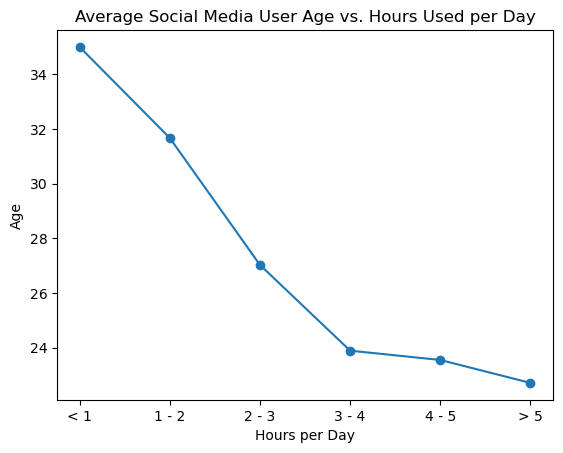

In [5]:
# Plot line graph depicting social media user age against hours of social media used per day
locs = range(0, len(age_time_avg))
labels = ["< 1", "1 - 2", "2 - 3", "3 - 4", "4 - 5", "> 5"]

age_time_avg.plot(kind="line", x=age_time_avg.index, y=list(age_time_avg), marker="o", ylabel="Age", xlabel="Hours per Day",
                 title="Average Social Media User Age vs. Hours Used per Day")

plt.xticks(ticks=locs, labels=labels)

plt.show()

In [6]:
#age_bins = [0, 19, 29, 39, 100]
#bin_label = ["< 20", "20-29", "30-39", "40+"]

# Set age groups and copy original dataframe
age_bins = [0, 18, 25, 35, 45, 55, 65, 75]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '55-65', '66+']

age_group_df = survey_df.copy()

In [7]:
# Add column with age groups to the new dataframe
age_group_df["Age groups"] = pd.cut(age_group_df["Age"], age_bins, labels=labels, include_lowest=True)

age_group_df.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,...,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score,Age groups
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3,5,3,...,2,5,2,3,2,5,4,5,43,19-25
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5+,4,3,...,5,4,5,1,1,5,4,5,43,19-25
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3-4,3,2,...,5,4,3,3,1,4,2,5,35,19-25
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",5+,4,2,...,5,3,5,1,2,4,3,2,35,19-25
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2-3,3,5,...,5,5,3,3,3,4,4,1,44,19-25


In [48]:
# Group by age groups and create a subgroup showing total users by hours per day
age_group_hours = age_group_df.groupby(["Age groups", "Hours per day"]).size().unstack()

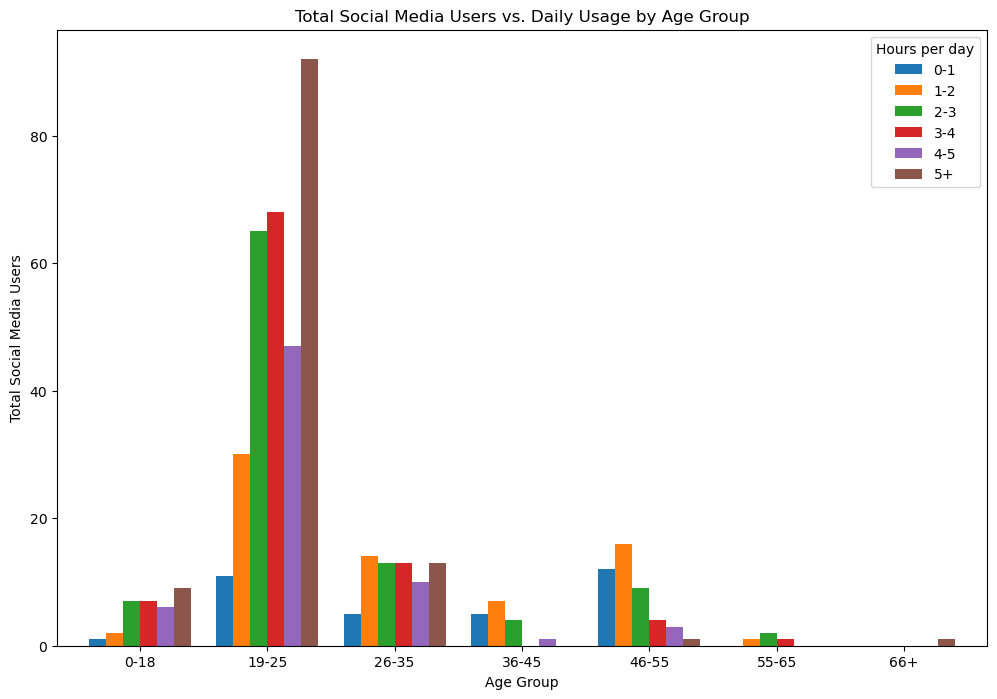

In [49]:
# Plot figure showing total number per usage per day broken down by age group
age_group_hours.plot(kind="bar", width=0.8, figsize=(12,8))

plt.title("Total Social Media Users vs. Daily Usage by Age Group")
plt.ylabel("Total Social Media Users")
plt.xlabel("Age Group")
plt.xticks(rotation=0)
plt.show()

## Age vs. Mental Health Score

In [11]:
# Define a regression function
def regression(x, y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    
    return plt.plot(x, regress_values, "r-"), print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.09007789788822729


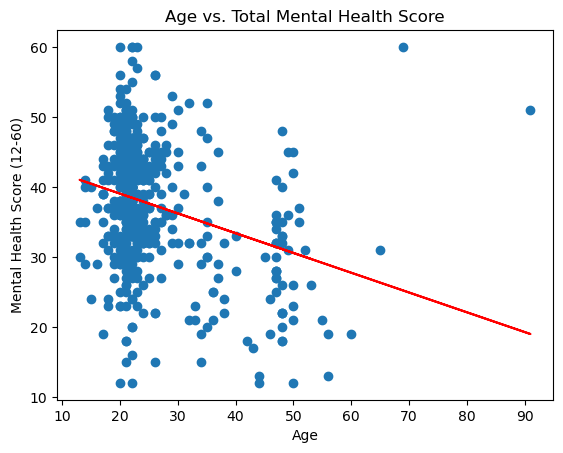

In [12]:
# Plot age against mental health score and determie correlation coefficient
plt.scatter(x=survey_df["Age"], y=survey_df["Total score"])
plt.xlabel("Age")
plt.ylabel("Mental Health Score (12-60)")
plt.title("Age vs. Total Mental Health Score")
regression(survey_df["Age"], survey_df["Total score"])

plt.show()

In [13]:
# Split dataframe to show only users with 0-4 hours of social media use per day
low_users_df = survey_df.loc[(survey_df["Hours per day"] == "0-1") | (survey_df["Hours per day"] == "1-2") | 
                             (survey_df["Hours per day"] == "2-3") | (survey_df["Hours per day"] == "3-4")]

low_users_df.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,...,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score
0,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3,5,3,...,5,2,5,2,3,2,5,4,5,43
2,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3-4,3,2,...,2,5,4,3,3,1,4,2,5,35
4,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2-3,3,5,...,4,5,5,3,3,3,4,4,1,44
5,22.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2-3,4,4,...,3,4,3,4,4,3,3,2,4,40
6,21.0,Female,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",3-4,4,3,...,2,4,3,5,3,4,5,5,3,43


The r-squared is: 0.12430237063293904


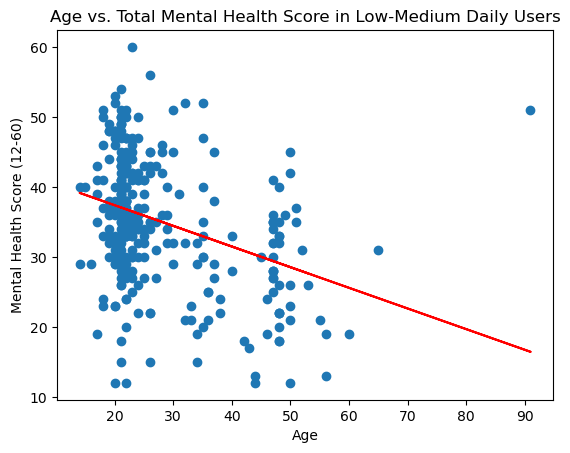

In [14]:
# Plot Age of low-medium daily users against mental health score to determine if there is any correlation
plt.scatter(x=low_users_df["Age"], y=low_users_df["Total score"])
plt.xlabel("Age")
plt.ylabel("Mental Health Score (12-60)")
plt.title("Age vs. Total Mental Health Score in Low-Medium Daily Users")
regression(low_users_df["Age"], low_users_df["Total score"])

plt.show()

In [15]:
# Split dataframe to show only users with 4-5+ hours of social media use per day
high_users_df = survey_df.loc[(survey_df["Hours per day"] == "4-5") | (survey_df["Hours per day"] == "5+")]

high_users_df.head()

,Age,Gender,Relationship status,Occupation,Affiliated organizations,Social media use,Platforms,Hours per day,Frequency social media use w/o purpose,Frequency distracted by social media,...,Distracted easily,Level worriedness,Difficulty Concentrating,Frequency comparisons to others social media,Feelings about comparisons,Frequency seeking validation from social media,Frequency of depressed feelings,Fluctuation of interest daily activities,Issues sleeping,Total score
1,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5+,4,3,...,4,5,4,5,1,1,5,4,5,43
3,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",5+,4,2,...,3,5,3,5,1,2,4,3,2,35
7,21.0,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",5+,5,2,...,3,3,1,1,3,1,5,5,1,33
8,21.0,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",5+,5,2,...,3,1,1,1,3,1,5,5,1,31
14,22.0,Male,Single,University Student,University,Yes,"Facebook, YouTube, Pinterest",5+,5,5,...,5,5,5,5,5,5,5,5,5,60


The r-squared is: 0.016938945021376477


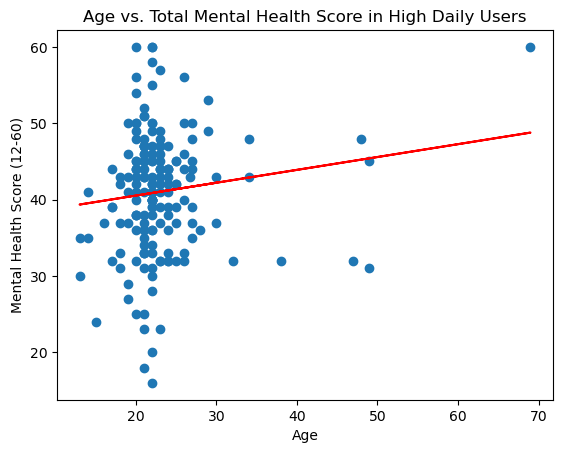

In [16]:
# Plot Age of high daily users against mental health score to determine if there is any correlation
plt.scatter(x=high_users_df["Age"], y=high_users_df["Total score"])
plt.xlabel("Age")
plt.ylabel("Mental Health Score (12-60)")
plt.title("Age vs. Total Mental Health Score in High Daily Users")
regression(high_users_df["Age"], high_users_df["Total score"])

plt.show()

## Social Media Hours Used vs. Mental Health Score

### Overall Boxplot - Hours Used vs. Score

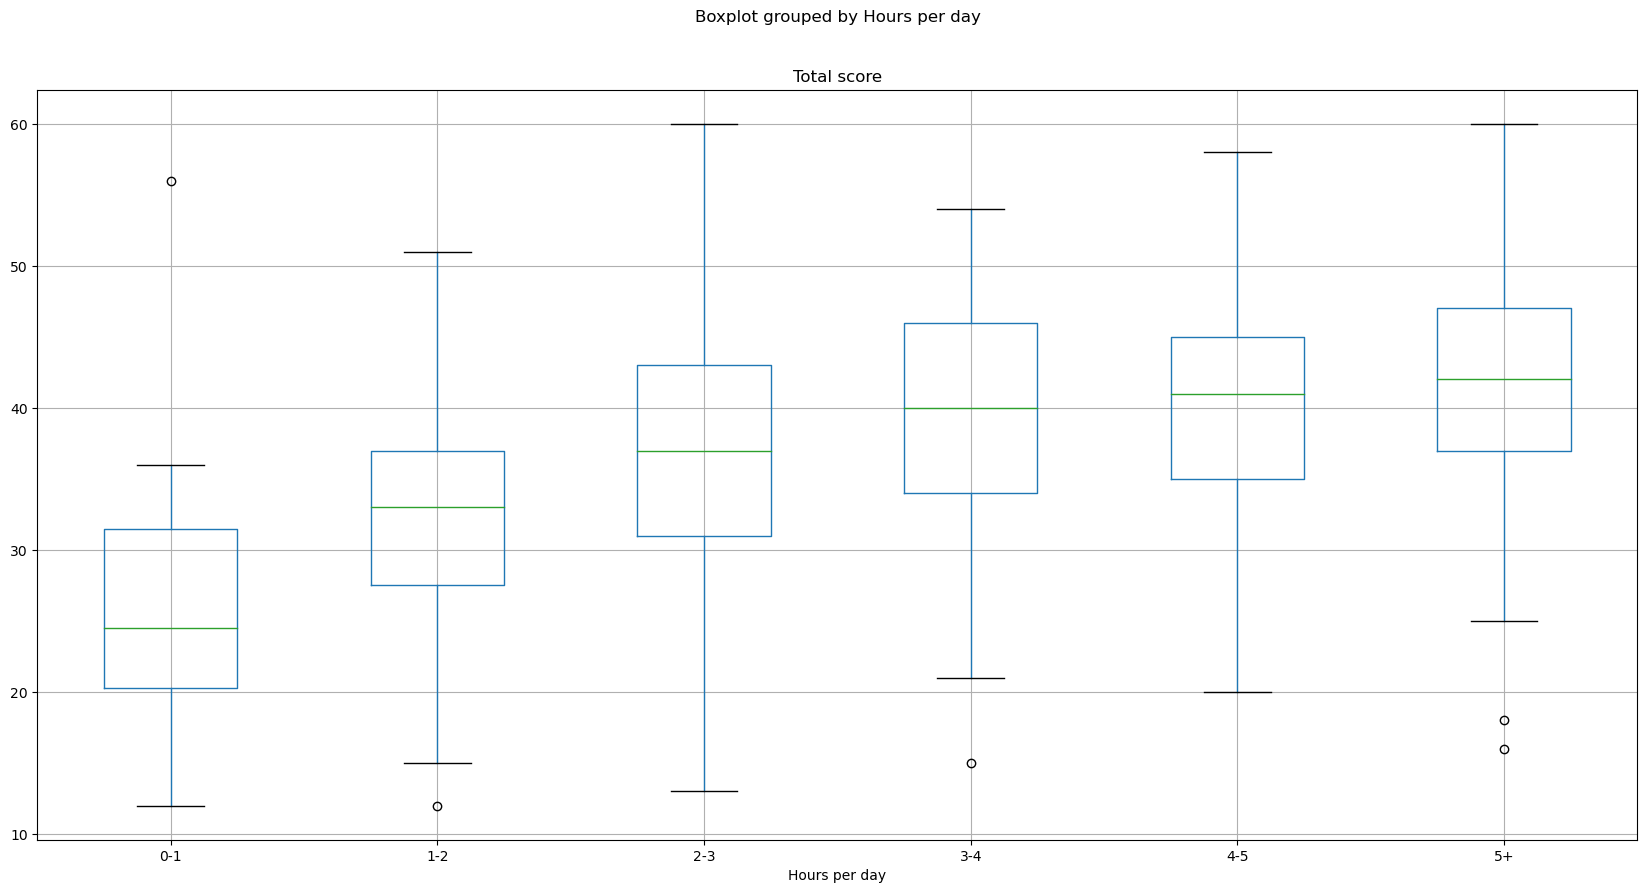

In [17]:
survey_df.boxplot("Total score", by="Hours per day", figsize=(20,10))
plt.show()

### Overall ANOVA - Hours Used vs. Score 

In [18]:
g0_1 = survey_df[survey_df["Hours per day"] == "0-1"]["Total score"]
g1_2 = survey_df[survey_df["Hours per day"] == "1-2"]["Total score"]
g2_3 = survey_df[survey_df["Hours per day"] == "2-3"]["Total score"]
g3_4 = survey_df[survey_df["Hours per day"] == "3-4"]["Total score"]
g4_5 = survey_df[survey_df["Hours per day"] == "4-5"]["Total score"]
g5_up = survey_df[survey_df["Hours per day"] == "5+"]["Total score"]

stats.f_oneway(g0_1, g1_2, g2_3, g3_4, g4_5, g5_up)

F_onewayResult(statistic=29.14535954167053, pvalue=8.109114754909043e-26)

### Overall Independent t-test - Hours Used vs. Score

In [19]:
# low_users_df and high_users_df have already been defined lowers in notebook

stats.ttest_ind(low_users_df["Total score"], high_users_df["Total score"], equal_var=False)

TtestResult(statistic=-7.538730891835496, pvalue=2.805214865924709e-13, df=433.1436944835482)

In [20]:
scores_age_group = age_group_df.groupby(["Age groups", "Hours per day"])["Total score"].mean()

scores_age_group

Age groups  Hours per day
0-18        0-1              19.000000
            1-2              32.000000
            2-3              35.857143
            3-4              40.857143
            4-5              32.833333
            5+               38.333333
19-25       0-1              26.090909
            1-2              35.900000
            2-3              38.338462
            3-4              39.073529
            4-5              40.936170
            5+               41.456522
26-35       0-1              30.400000
            1-2              29.285714
            2-3              37.846154
            3-4              39.538462
            4-5              39.800000
            5+               45.000000
36-45       0-1              17.000000
            1-2              31.571429
            2-3              25.250000
            3-4                    NaN
            4-5              32.000000
            5+                     NaN
46-55       0-1              26.416667

### <18 Age Group Boxplot - Hours Used vs. Score

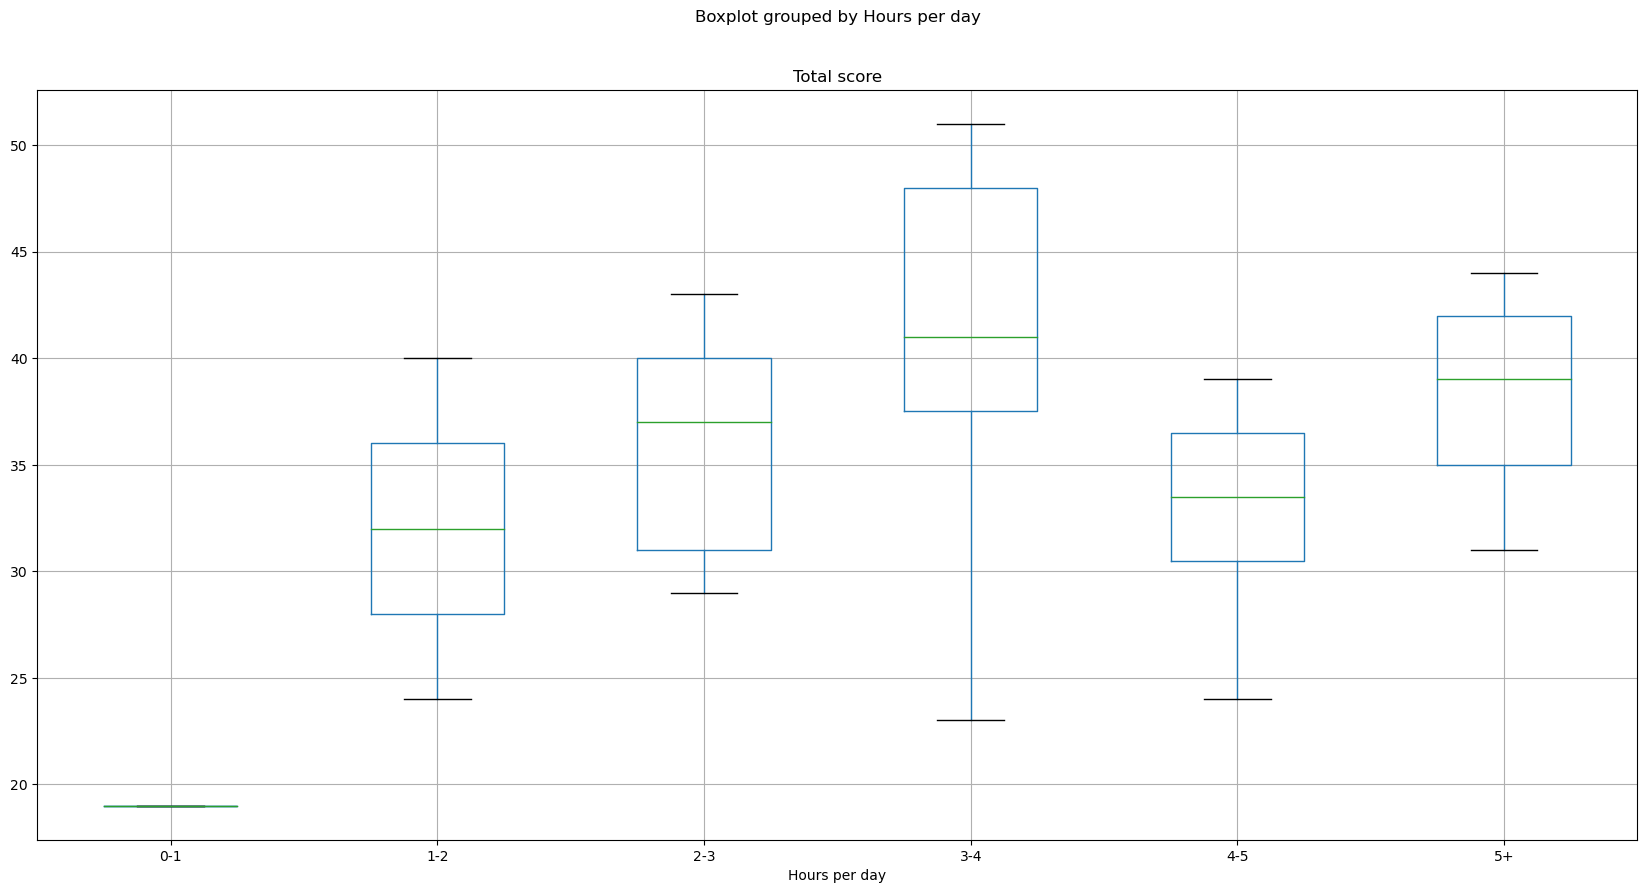

In [21]:
less18_df = age_group_df.loc[age_group_df["Age groups"] == "0-18"]

less18_df.boxplot("Total score", by="Hours per day", figsize=(20,10))
plt.show()

### <18 Age Group ANOVA - Hours Used vs. Score 

In [22]:
g0_1 = less18_df[less18_df["Hours per day"] == "0-1"]["Total score"]
g1_2 = less18_df[less18_df["Hours per day"] == "1-2"]["Total score"]
g2_3 = less18_df[less18_df["Hours per day"] == "2-3"]["Total score"]
g3_4 = less18_df[less18_df["Hours per day"] == "3-4"]["Total score"]
g4_5 = less18_df[less18_df["Hours per day"] == "4-5"]["Total score"]
g5_up = less18_df[less18_df["Hours per day"] == "5+"]["Total score"]

stats.f_oneway(g0_1, g1_2, g2_3, g3_4, g4_5, g5_up)

F_onewayResult(statistic=2.5613142732690517, pvalue=0.051761765743704016)

### 19-25 Age Group Boxplot - Hours Used vs. Score

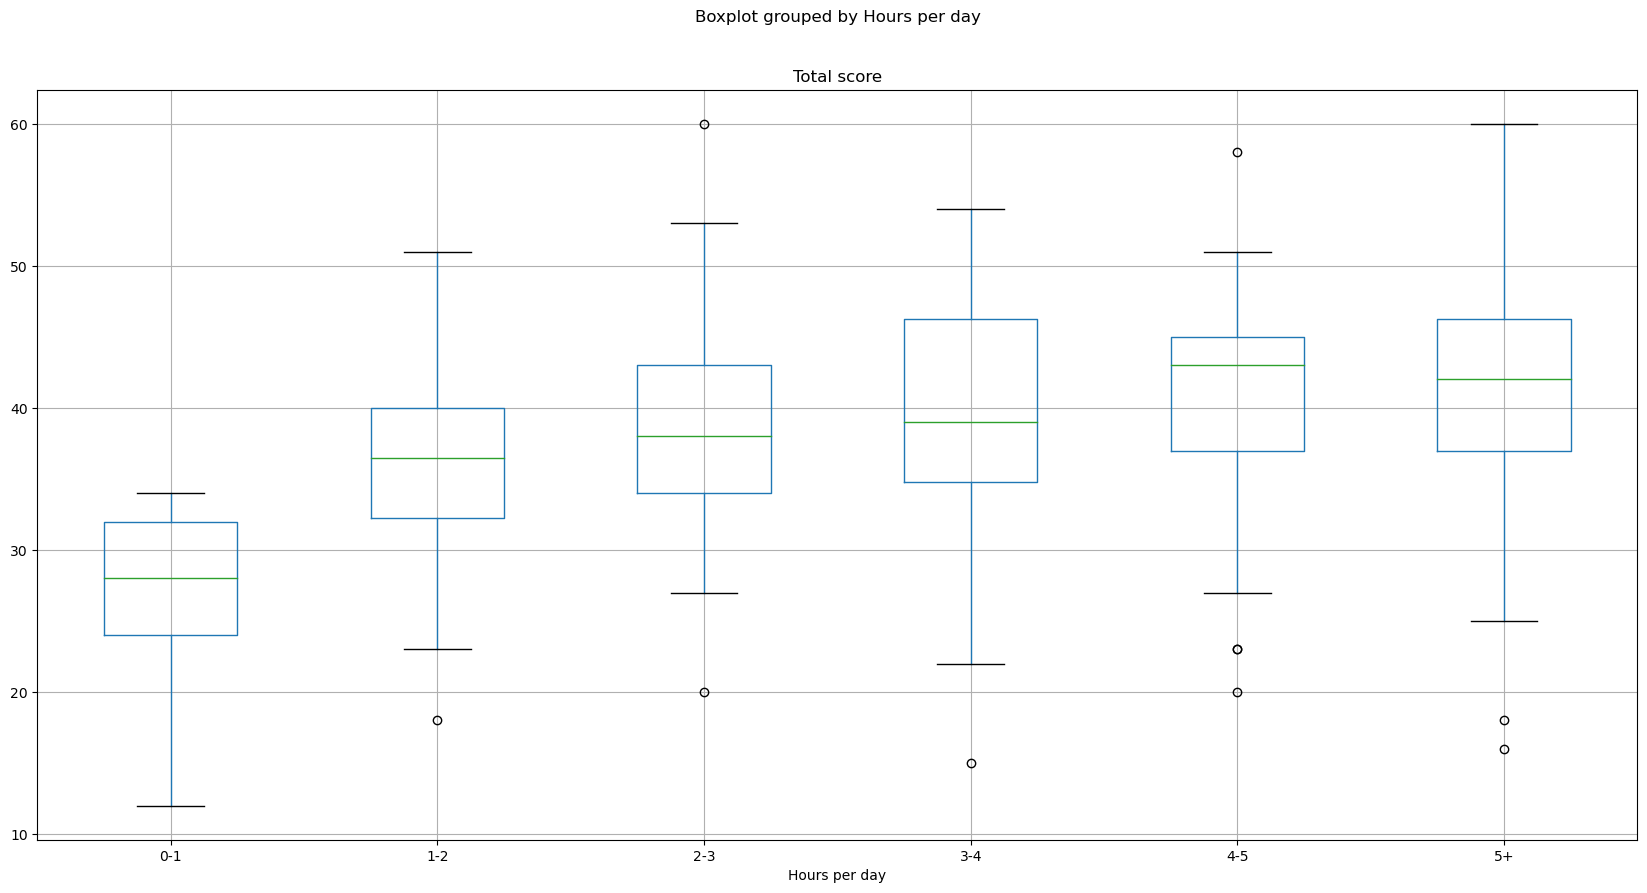

In [23]:
lowtwenties_df = age_group_df.loc[age_group_df["Age groups"] == "19-25"]

lowtwenties_df.boxplot("Total score", by="Hours per day", figsize=(20,10))
plt.show()

### 19-25 Age Group ANOVA - Hours Used vs. Score 

In [24]:
g0_1 = lowtwenties_df[lowtwenties_df["Hours per day"] == "0-1"]["Total score"]
g1_2 = lowtwenties_df[lowtwenties_df["Hours per day"] == "1-2"]["Total score"]
g2_3 = lowtwenties_df[lowtwenties_df["Hours per day"] == "2-3"]["Total score"]
g3_4 = lowtwenties_df[lowtwenties_df["Hours per day"] == "3-4"]["Total score"]
g4_5 = lowtwenties_df[lowtwenties_df["Hours per day"] == "4-5"]["Total score"]
g5_up = lowtwenties_df[lowtwenties_df["Hours per day"] == "5+"]["Total score"]

stats.f_oneway(g0_1, g1_2, g2_3, g3_4, g4_5, g5_up)

F_onewayResult(statistic=9.400670182859933, pvalue=2.3759313125091938e-08)

### 26-35 Age Group Boxplot - Hours Used vs. Score

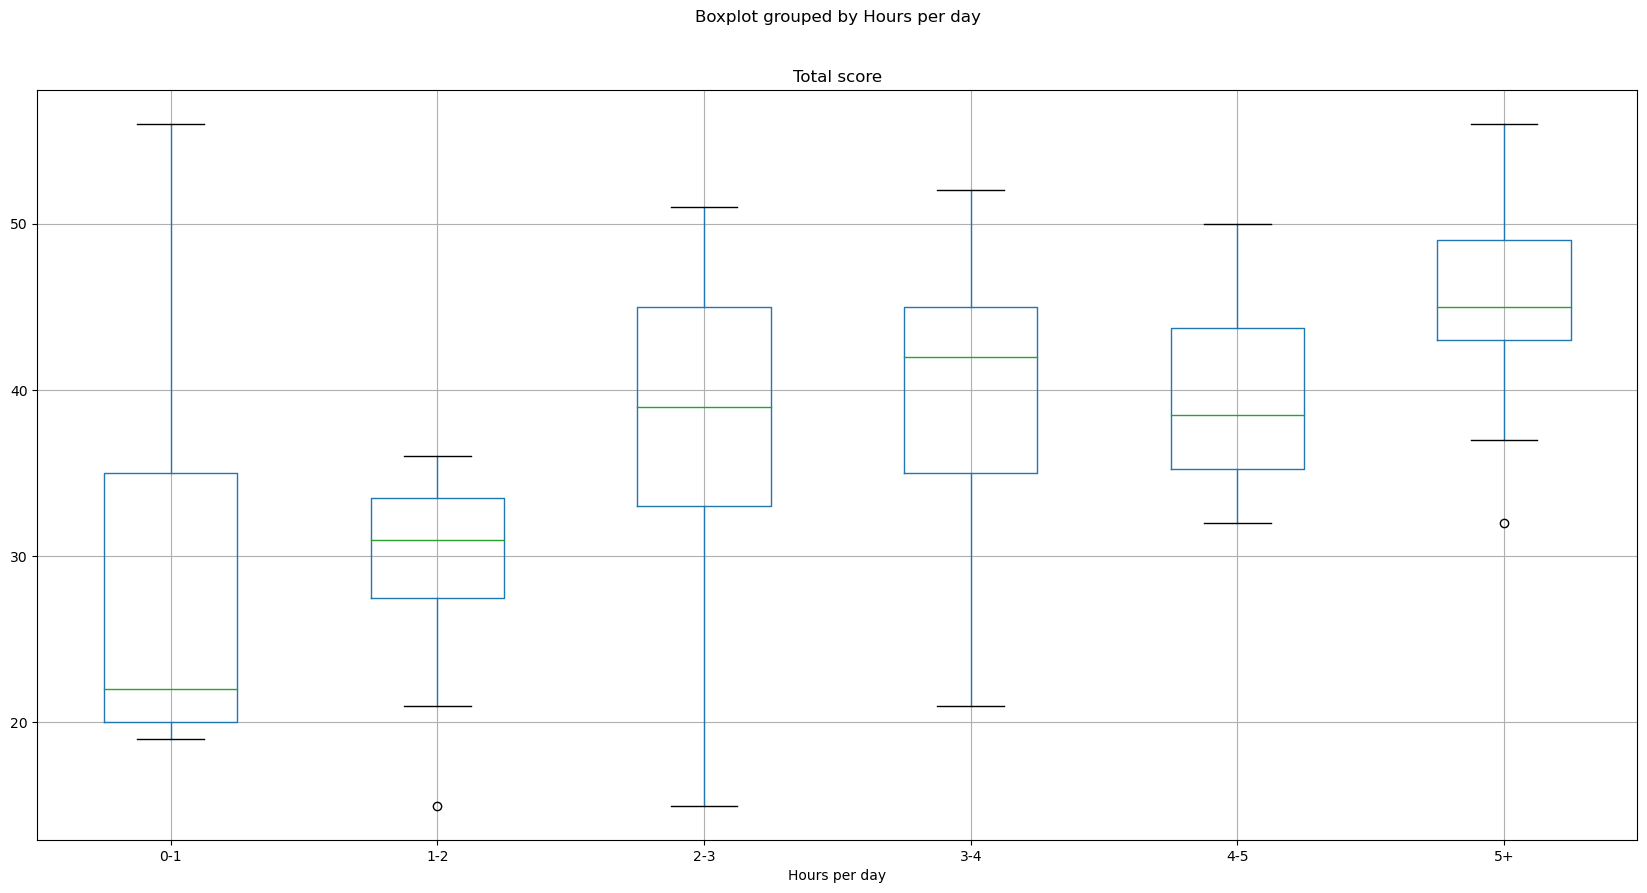

In [25]:
thirties_df = age_group_df.loc[age_group_df["Age groups"] == "26-35"]

thirties_df.boxplot("Total score", by="Hours per day", figsize=(20,10))
plt.show()

### 26-35 Age Group ANOVA - Hours Used vs. Score 

In [26]:
g0_1 = thirties_df[thirties_df["Hours per day"] == "0-1"]["Total score"]
g1_2 = thirties_df[thirties_df["Hours per day"] == "1-2"]["Total score"]
g2_3 = thirties_df[thirties_df["Hours per day"] == "2-3"]["Total score"]
g3_4 = thirties_df[thirties_df["Hours per day"] == "3-4"]["Total score"]
g4_5 = thirties_df[thirties_df["Hours per day"] == "4-5"]["Total score"]
g5_up = thirties_df[thirties_df["Hours per day"] == "5+"]["Total score"]

stats.f_oneway(g0_1, g1_2, g2_3, g3_4, g4_5, g5_up)

F_onewayResult(statistic=5.534461139403367, pvalue=0.0002816233170514804)

### 46-55 Age Group Boxplot - Hours Used vs. Score

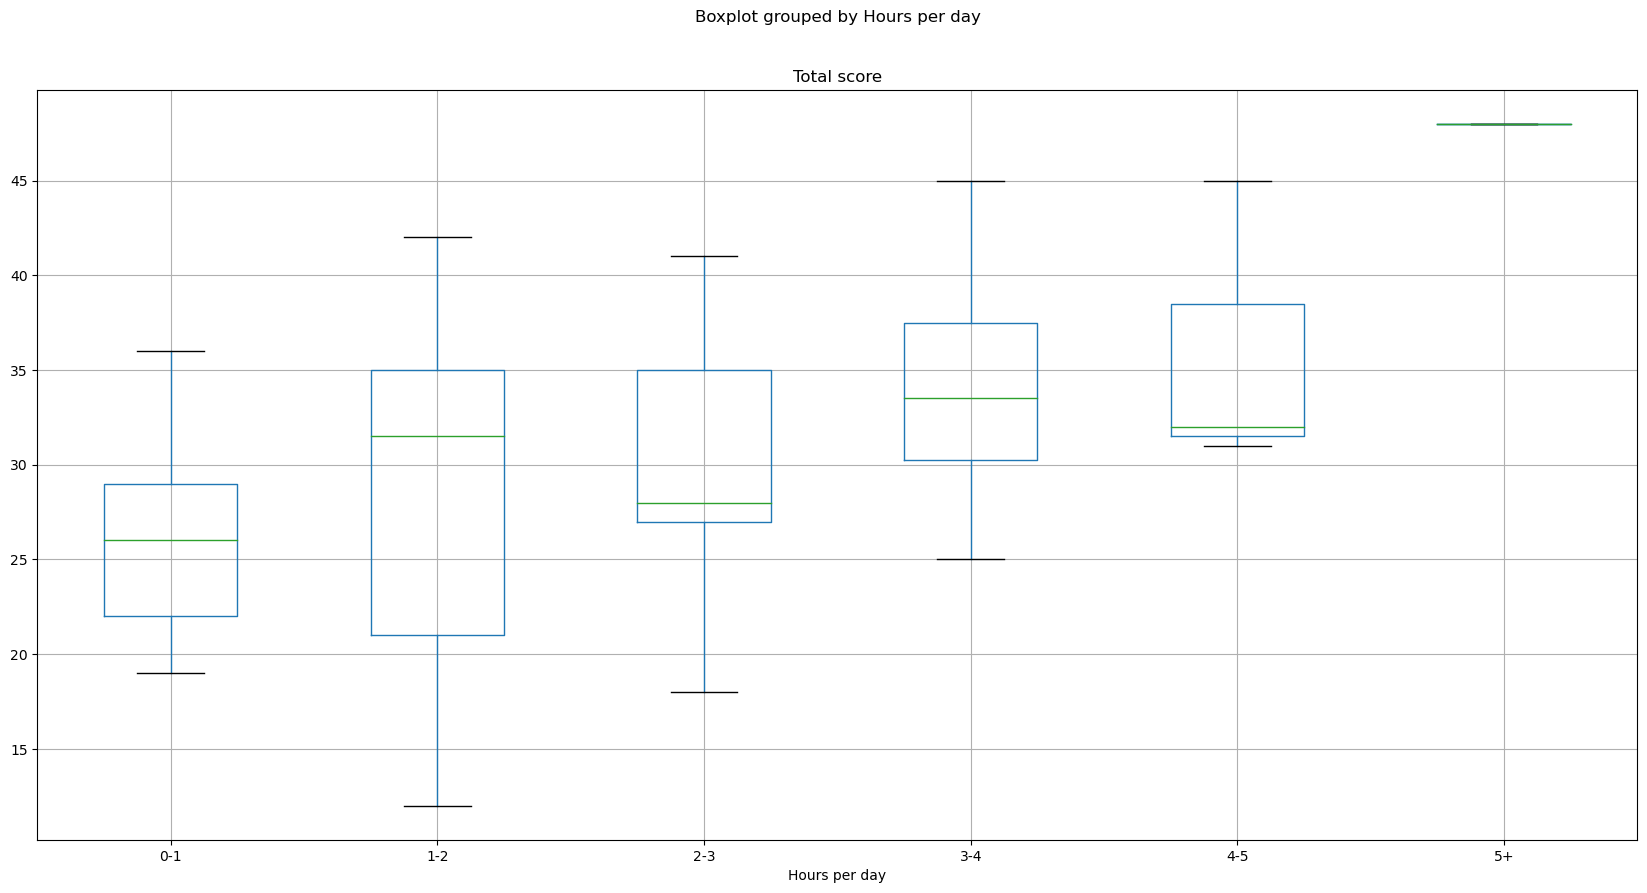

In [27]:
above40_df = age_group_df.loc[age_group_df["Age groups"] == "46-55"]

above40_df.boxplot("Total score", by="Hours per day", figsize=(20,10))
plt.show()

### 40+ Age Group ANOVA - Hours Used vs. Score 

In [28]:
g0_1 = above40_df[above40_df["Hours per day"] == "0-1"]["Total score"]
g1_2 = above40_df[above40_df["Hours per day"] == "1-2"]["Total score"]
g2_3 = above40_df[above40_df["Hours per day"] == "2-3"]["Total score"]
g3_4 = above40_df[above40_df["Hours per day"] == "3-4"]["Total score"]
g4_5 = above40_df[above40_df["Hours per day"] == "4-5"]["Total score"]
g5_up = above40_df[above40_df["Hours per day"] == "5+"]["Total score"]

stats.f_oneway(g0_1, g1_2, g2_3, g3_4, g4_5, g5_up)

F_onewayResult(statistic=2.5181644914160635, pvalue=0.045473711051482735)